# Libraries

In [133]:
import numpy as np
from PIL import Image # read, write image
import matplotlib.pyplot as plt # show image

max = 100

# Read, Show, Write Image

In [134]:
def readImg(filename) :
  with Image.open(filename) as image:
    image = image.convert("RGB")
    imgArr = np.array(image, dtype = np.float32) / 255.0 # convert to [0, 1]
    return imgArr

In [135]:
def showImg(imgArr) :
  imgArr = (imgArr * 255).clip(0, 255).astype(np.uint8) # convert to [0, 255] and uint8 type
  plt.imshow(imgArr)

In [136]:
def printImg(imgArr, filename, extension) :
  imgArr = (imgArr * 255).clip(0, 255).astype(np.uint8)
  image = Image.fromarray(imgArr)
  filename = filename.rsplit('/', 1)[-1].rsplit('.', 1)[0] # remove old extension
  image.save("output_" + filename + "." + extension)

# Conversion

In [137]:
def convertArr1D(imgArr) :
  return imgArr.reshape(-1, 3)

In [138]:
def convertArr2D(imgArr, ogShape) :
    return imgArr.reshape(ogShape)

# K-means

In [139]:
def getCentroids(imgArr, k) :
  centroids = [imgArr[np.random.choice(imgArr.shape[0])]]

  for _ in range(1, k) :
      distances = np.min(np.array([np.sum((imgArr - c) ** 2, axis = 1) for c in centroids]), axis = 0) # minEuclid : min(totalSum(imgArr - centroids)^2)
      probs = distances / distances.sum()
      idx = np.random.choice(imgArr.shape[0], p = probs)
      newCentroids = imgArr[idx]
      centroids.append(newCentroids)

  return np.array(centroids)

In [140]:
def getLabels(imgArr, centroids) :
  distances = np.sqrt(((imgArr[:, np.newaxis, :] - centroids) ** 2).sum(axis = 2)) # Euclid : d(x, c) = sqrt(totalSum(x - c)^2)
  return np.argmin(distances, axis = 1)

In [141]:
def  getNewCentroids(imgArr, labels, k) :
  newCentroids = np.zeros((k, imgArr.shape[1]))
  for i in range(k) :
      clusterPoints = imgArr[labels == i]
      if len(clusterPoints) > 0:
          newCentroids[i] = np.mean(clusterPoints, axis=0)
      else: # if cluster empty
          newCentroids[i] = imgArr[np.random.choice(imgArr.shape[0])]
  return newCentroids

In [142]:
def  KMeans(imgArr, k) :
  imgArr = convertArr1D(imgArr)
  centroids = getCentroids(imgArr, k)
  for _ in range (1, max) :
    labels = getLabels(imgArr, centroids)
    newCentroids = getNewCentroids(imgArr, labels, k)
    if np.allclose(centroids, newCentroids, atol = 1e-4, rtol = 0) : break
    centroids = newCentroids

  return centroids, labels

# Main

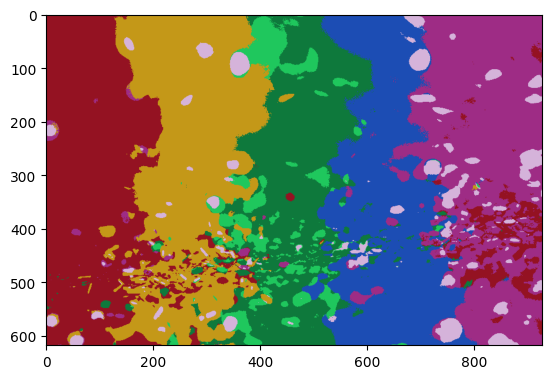

In [143]:
def main() :
  filename = input("Input filename: ") # filename with extension
  imgArr = readImg(filename)
  ogShape = imgArr.shape
  k = int(input("K clusters: ")) # example : 3, 5, 7,...
  centroids, labels = KMeans(imgArr, k)
  newImg = convertArr2D(centroids[labels], ogShape)
  showImg(newImg)
  extension = input("Type output: ") # example : png, pdf,...
  printImg(newImg, filename, extension)
  return

if __name__ == "__main__":
  main()